# Students Performance
_By: Samah Balkhair_

---

The dataset, StudentsPerformance.csv, a kaggle dataset 


## A. Import And Read the Dataset

In [20]:
#import the relevent libraries for data reading, cleaning, and analysis
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.5)

plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [21]:
std_df = pd.read_csv('data/StudentsPerformance.csv')

In [22]:
std_df.shape

(1000, 8)

In [23]:
std_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [24]:
std_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [25]:
std_df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


---
## B. Explor Columns

In [26]:
list(zip(std_df.columns, std_df.nunique()))

[('gender', 2),
 ('race/ethnicity', 5),
 ('parental level of education', 6),
 ('lunch', 2),
 ('test preparation course', 2),
 ('math score', 81),
 ('reading score', 72),
 ('writing score', 77)]

In [27]:
# Print the unique values of every column if the number of unique values in that column is 10 or less.
for col in std_df:
    if std_df[col].nunique() <= 10:
        print(col,std_df[col].unique())

gender ['female' 'male']
race/ethnicity ['group B' 'group C' 'group A' 'group D' 'group E']
parental level of education ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch ['standard' 'free/reduced']
test preparation course ['none' 'completed']


In [28]:
std_df.gender.value_counts()

female    518
male      482
Name: gender, dtype: int64

As we want to measure the performance of of each subject indivisulally, we want also to measure the overall score for the students.
Therefore, we will add additional colume in the students performance table which is the avarge score for the three subjects.

In [29]:
std_df['overall score']= std_df[['math score','reading score','writing score']].mean(axis=1)
std_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,overall score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


---
## C. Visualize Distribution
Figour out the the avarge score for overall score for all students

In [30]:
std_df['overall score'].mean()

67.77066666666664

<AxesSubplot:xlabel='overall score', ylabel='Count'>

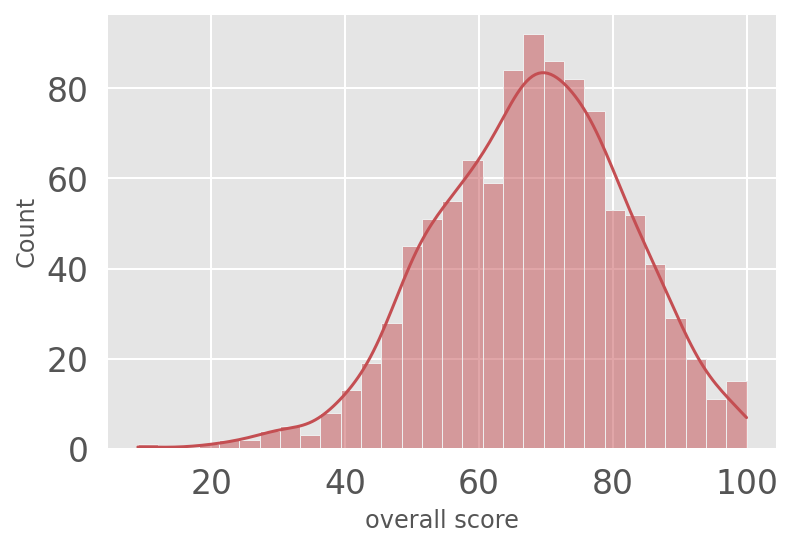

In [31]:
sns.histplot(data=std_df,x='overall score',bins=30,kde=True,color='r')

In [32]:
std_df.groupby('gender')['overall score'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,518.0,69.569498,14.541809,9.0,60.666667,70.333333,78.666667,100.0
male,482.0,65.837483,13.698840,23.0,56.000000,66.333333,76.250000,100.0


<AxesSubplot:xlabel='overall score', ylabel='Count'>

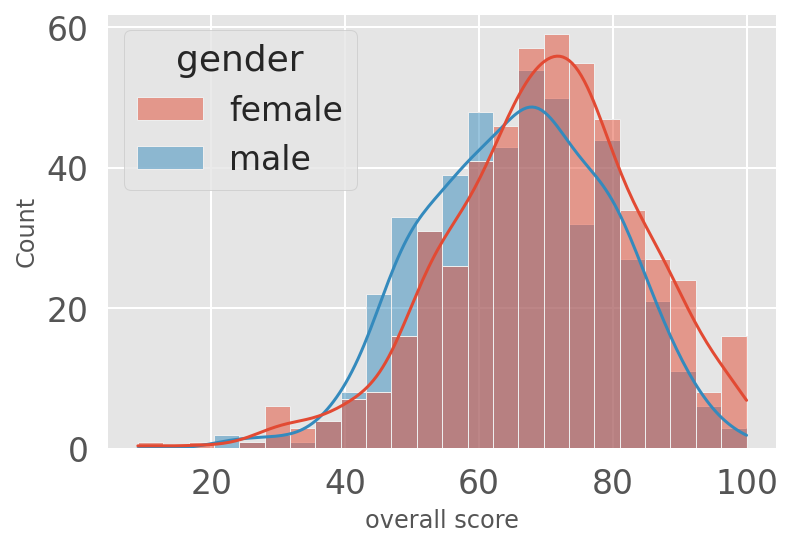

In [33]:
sns.histplot(data=std_df,x='overall score',kde=True,hue='gender')

In [34]:
std_df.groupby('gender')['math score'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,518.0,63.633205,15.491453,0.0,54.0,65.0,74.0,100.0
male,482.0,68.728216,14.356277,27.0,59.0,69.0,79.0,100.0


<AxesSubplot:xlabel='math score', ylabel='Count'>

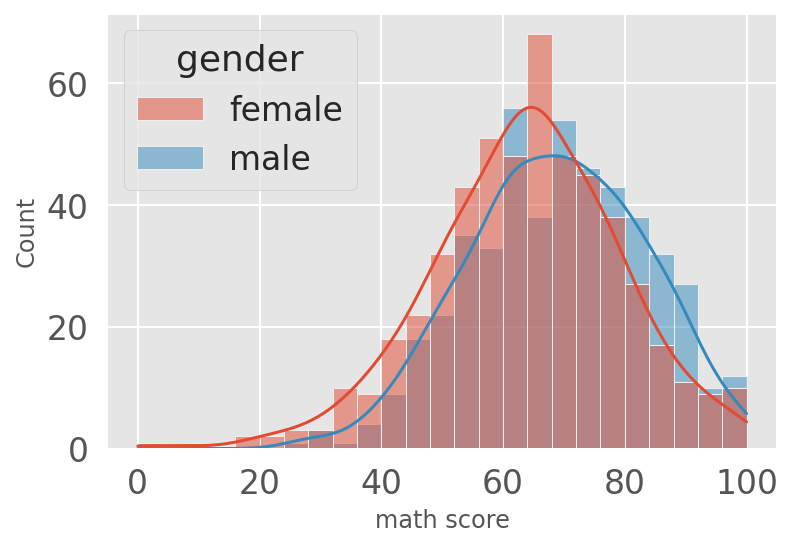

In [35]:
sns.histplot(data=std_df,x='math score',kde=True,hue='gender')

In [36]:
std_df.groupby('gender')['reading score'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,518.0,72.608108,14.378245,17.0,63.25,73.0,83.0,100.0
male,482.0,65.473029,13.931832,23.0,56.00,66.0,75.0,100.0


<AxesSubplot:xlabel='reading score', ylabel='Count'>

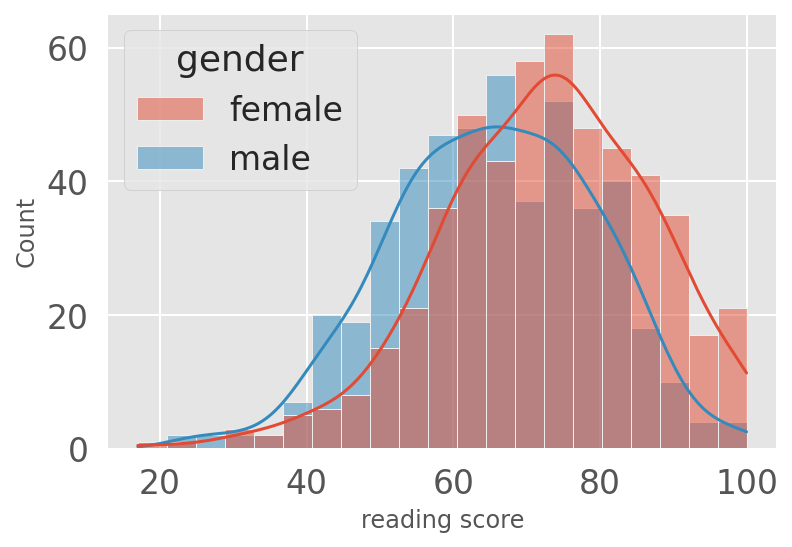

In [37]:
sns.histplot(data=std_df,x='reading score',kde=True,hue='gender')

<AxesSubplot:xlabel='writing score', ylabel='Count'>

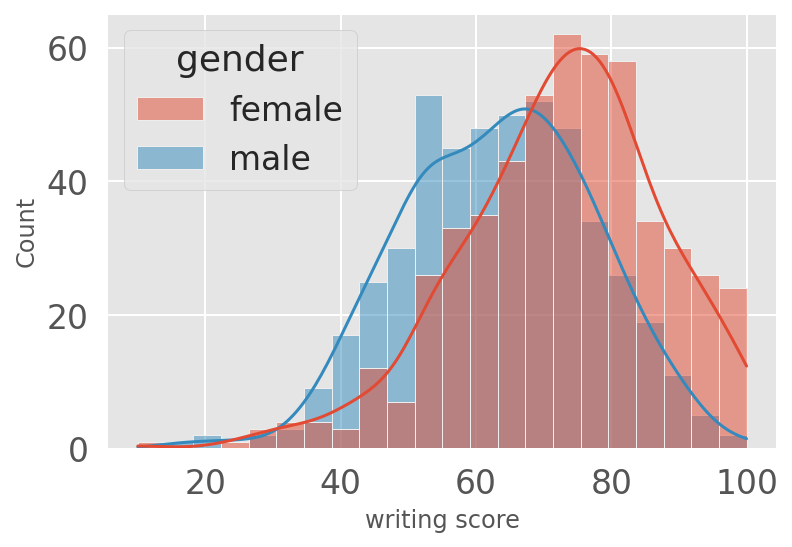

In [38]:
sns.histplot(data=std_df,x='writing score',kde=True,hue='gender')

---
## D. Conclusion

We can conclude from the data above that the female students tend to prefome better in overall scores, however, the male students in general have a better performance in math subject at spacific. 

In other words, while the male students tend to perform better in mathe, female students have the better performance in overall score.

<img src="https://cdn5.vectorstock.com/i/1000x1000/15/14/cute-jumping-girl-winner-with-gold-medal-hanging-vector-35721514.jpg" width="20%" align="center"/></a>  